<h1 style="color: #e1473f;">Proyecto final: </h1> 
<h1 style="color: #80b0ab; margin-left: 200px;">Inmobiliaria PK2</h1>
<p style="margin: 20px;">

<h3 style= "color:#80b0ab">1.Importar librerias</h3>

In [1]:
!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from statistics import mode

<h3 style= "color:#80b0ab">2.Importar set de datos</h3>

In [3]:
df = pd.read_excel("casas.xlsx", sheet_name='casas')

<h3 style= "color:#80b0ab">3.Revisar encabezados</h3>

In [4]:
df.shape

(195402, 14)

In [5]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.953840e+05,195402.000000,1.953990e+05,1.953990e+05,195399.000000
mean,1.052380e+06,2007.523024,2.187752e+05,3.633914e+05,1.815565
std,1.255368e+07,8.544315,1.129920e+06,1.599604e+06,144.511696
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.089500e+04,2001.000000,6.872000e+04,1.300000e+05,0.443097
50%,2.037000e+04,2002.000000,1.090600e+05,2.140000e+05,0.524000
75%,2.000260e+05,2020.000000,1.860600e+05,3.550000e+05,0.622181
max,2.000500e+09,2020.000000,8.788848e+07,3.187900e+08,41303.500000


In [6]:
df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location;;;;;'],
      dtype='object')

<h3 style= "color:#dbd1b3">3.1.Renombrar encabezados </h3>

In [7]:
df.rename({"Serial Number":"serialNumber"}, axis=1, inplace=True)
df.rename({"List Year":"listYear"}, axis=1, inplace=True)
df.rename({"Date Recorded":"dateRecorded"}, axis=1, inplace=True)
df.rename({"Town":"town"}, axis=1, inplace=True)
df.rename({"Address":"address"}, axis=1, inplace=True)
df.rename({"Assessed Value":"assessedValue"}, axis=1, inplace=True)
df.rename({"Sale Amount":"saleAmount"}, axis=1, inplace=True)
df.rename({"Sales Ratio":"salesRatio"}, axis=1, inplace=True)
df.rename({"Sales Ratio":"salesRatio"}, axis=1, inplace=True)
df.rename({"Property Type":"propertyType"}, axis=1, inplace=True)
df.rename({"Residential Type":"residentialType"}, axis=1, inplace=True)
df.rename({"Non Use Code":"nonUseCode"}, axis=1, inplace=True)
df.rename({"Assessor Remarks":"assessorRemarks"}, axis=1, inplace=True)
df.rename({"OPM remarks":"opmRemarks"}, axis=1, inplace=True)
df.rename({"Location;;;;;":"location"}, axis=1, inplace=True)



In [8]:
df.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'opmRemarks',
       'location'],
      dtype='object')

In [9]:
df.head(10)



,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20200091.0,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,2239530.0,0.000450,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,;;;;;
1,202299.0,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410.0,103000000.0,0.523200,Apartments,NaN,NaN,1-36-50-0,NaN,POINT (-73.41685 41.1181);;;;;
2,200337.0,2020,2021-03-01,Trumbull,900 OLD TOWN RD,44178260.0,82000000.0,0.538759,Apartments,NaN,NaN,NaN,NaN,POINT (-73.19199 41.22563);;;;;
3,200853.0,2020,2021-02-08,Norwalk,500 WEST AVE,28728133.0,45870000.0,0.626200,Apartments,NaN,NaN,1-20-1-0,NaN,POINT (-73.41666 41.11172);;;;;
4,20605.0,2020,2021-06-07,East Hartford,66 PLAIN DR,12619520.0,44850000.0,0.281300,Apartments,NaN,NaN,NaN,NaN,;;;;;
5,201408.0,2020,2021-08-24,Danbury,6-10 CLAPBOARD RIDGE RD,21014000.0,41200000.0,0.510000,Apartments,NaN,NaN,H12003,NaN,POINT (-73.46548 41.40597);;;;;
6,200772.0,2020,2021-05-14,Meriden,211 POMEROY AVE,17535000.0,34800000.0,0.503879,Apartments,NaN,NaN,NaN,NaN,POINT (-72.76406 41.52083);;;;;
7,2020142.0,2020,2020-12-18,Wilton,116 DANBURY RD,21841190.0,34750000.0,0.628523,Apartments,NaN,NaN,NaN,NaN,;;;;;
8,200722.0,2020,2021-04-30,West Hartford,1248-1260 FARMINGTON AVENUE,18830000.0,31500000.0,0.597700,Apartments,NaN,NaN,NaN,NaN,;;;;;
9,20200432.0,2020,2021-01-05,Stratford,1600 CUTSPRING ROAD,15573320.0,30600000.0,0.508900,Apartments,NaN,NaN,NaN,NaN,POINT (-73.13067 41.23844);;;;;


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195402 entries, 0 to 195401
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   serialNumber     195384 non-null  float64       
 1   listYear         195402 non-null  int64         
 2   dateRecorded     195400 non-null  datetime64[ns]
 3   town             195402 non-null  object        
 4   address          195395 non-null  object        
 5   assessedValue    195399 non-null  float64       
 6   saleAmount       195399 non-null  float64       
 7   salesRatio       195399 non-null  float64       
 8   propertyType     62042 non-null   object        
 9   residentialType  56711 non-null   object        
 10  nonUseCode       44230 non-null   object        
 11  assessorRemarks  12788 non-null   object        
 12  opmRemarks       1683 non-null    object        
 13  location         195127 non-null  object        
dtypes: datetime64[ns](1)

In [11]:
df.replace("?",np.nan, inplace=True)

In [12]:
df.head()

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20200091.0,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,2239530.0,0.000450,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,;;;;;
1,202299.0,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410.0,103000000.0,0.523200,Apartments,NaN,NaN,1-36-50-0,NaN,POINT (-73.41685 41.1181);;;;;
2,200337.0,2020,2021-03-01,Trumbull,900 OLD TOWN RD,44178260.0,82000000.0,0.538759,Apartments,NaN,NaN,NaN,NaN,POINT (-73.19199 41.22563);;;;;
3,200853.0,2020,2021-02-08,Norwalk,500 WEST AVE,28728133.0,45870000.0,0.626200,Apartments,NaN,NaN,1-20-1-0,NaN,POINT (-73.41666 41.11172);;;;;
4,20605.0,2020,2021-06-07,East Hartford,66 PLAIN DR,12619520.0,44850000.0,0.281300,Apartments,NaN,NaN,NaN,NaN,;;;;;


In [13]:
dfTemp = df.isnull()
dfTemp.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,True,False,True,False
2,False,False,False,False,False,False,False,False,False,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,True,True,True,True,False
5,False,False,False,False,False,False,False,False,False,True,True,False,True,False
6,False,False,False,False,False,False,False,False,False,True,True,True,True,False
7,False,False,False,False,False,False,False,False,False,True,True,True,True,False
8,False,False,False,False,False,False,False,False,False,True,True,True,True,False
9,False,False,False,False,False,False,False,False,False,True,True,True,True,False


In [14]:
for columna in dfTemp.columns.values.tolist():
    print (columna)
    print (dfTemp[columna].value_counts())
    print("")

serialNumber
False    195384
True         18
Name: serialNumber, dtype: int64

listYear
False    195402
Name: listYear, dtype: int64

dateRecorded
False    195400
True          2
Name: dateRecorded, dtype: int64

town
False    195402
Name: town, dtype: int64

address
False    195395
True          7
Name: address, dtype: int64

assessedValue
False    195399
True          3
Name: assessedValue, dtype: int64

saleAmount
False    195399
True          3
Name: saleAmount, dtype: int64

salesRatio
False    195399
True          3
Name: salesRatio, dtype: int64

propertyType
True     133360
False     62042
Name: propertyType, dtype: int64

residentialType
True     138691
False     56711
Name: residentialType, dtype: int64

nonUseCode
True     151172
False     44230
Name: nonUseCode, dtype: int64

assessorRemarks
True     182614
False     12788
Name: assessorRemarks, dtype: int64

opmRemarks
True     193719
False      1683
Name: opmRemarks, dtype: int64

location
False    195127
True        275


In [15]:
promlistYear= df["listYear"].astype("float").mean(axis=0)
df["listYear"].replace(np.nan, promlistYear, inplace=True)
df.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,20200091.0,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,2239530.0,0.000450,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,;;;;;
1,202299.0,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410.0,103000000.0,0.523200,Apartments,NaN,NaN,1-36-50-0,NaN,POINT (-73.41685 41.1181);;;;;
2,200337.0,2020,2021-03-01,Trumbull,900 OLD TOWN RD,44178260.0,82000000.0,0.538759,Apartments,NaN,NaN,NaN,NaN,POINT (-73.19199 41.22563);;;;;
3,200853.0,2020,2021-02-08,Norwalk,500 WEST AVE,28728133.0,45870000.0,0.626200,Apartments,NaN,NaN,1-20-1-0,NaN,POINT (-73.41666 41.11172);;;;;
4,20605.0,2020,2021-06-07,East Hartford,66 PLAIN DR,12619520.0,44850000.0,0.281300,Apartments,NaN,NaN,NaN,NaN,;;;;;


In [16]:
for columna in dfTemp.columns.values.tolist():
    print (columna)
    print (dfTemp[columna].value_counts())
    print("")

serialNumber
False    195384
True         18
Name: serialNumber, dtype: int64

listYear
False    195402
Name: listYear, dtype: int64

dateRecorded
False    195400
True          2
Name: dateRecorded, dtype: int64

town
False    195402
Name: town, dtype: int64

address
False    195395
True          7
Name: address, dtype: int64

assessedValue
False    195399
True          3
Name: assessedValue, dtype: int64

saleAmount
False    195399
True          3
Name: saleAmount, dtype: int64

salesRatio
False    195399
True          3
Name: salesRatio, dtype: int64

propertyType
True     133360
False     62042
Name: propertyType, dtype: int64

residentialType
True     138691
False     56711
Name: residentialType, dtype: int64

nonUseCode
True     151172
False     44230
Name: nonUseCode, dtype: int64

assessorRemarks
True     182614
False     12788
Name: assessorRemarks, dtype: int64

opmRemarks
True     193719
False      1683
Name: opmRemarks, dtype: int64

location
False    195127
True        275


In [17]:
df.dtypes

serialNumber              float64
listYear                    int64
dateRecorded       datetime64[ns]
town                       object
address                    object
assessedValue             float64
saleAmount                float64
salesRatio                float64
propertyType               object
residentialType            object
nonUseCode                 object
assessorRemarks            object
opmRemarks                 object
location                   object
dtype: object

In [18]:
promserialNumber= df["serialNumber"].astype("float").mean(axis=0)
df["serialNumber"].replace(np.nan, promserialNumber, inplace=True)

In [19]:
promListYear= df["listYear"].astype("float").mean(axis=0)
df["listYear"].replace(np.nan, promListYear, inplace=True)

In [20]:
df["address"].value_counts().idxmax()

'MULTI ADDRESSES'

In [21]:
df["address"].replace(np.nan, "MULTI ADDRESSES", inplace=True)


In [22]:
promAssessedValue= df["assessedValue"].astype("float").mean(axis=0)
df["assessedValue"].replace(np.nan, promAssessedValue, inplace=True)

In [23]:
promSaleAmount= df["saleAmount"].astype("float").mean(axis=0)
df["saleAmount"].replace(np.nan, promSaleAmount, inplace=True)


In [24]:
promSalesRatio= df["salesRatio"].astype("float").mean(axis=0)
df["salesRatio"].replace(np.nan, promSalesRatio, inplace=True)


In [25]:
df["propertyType"].value_counts().idxmax()

'Residential'

In [26]:
df["propertyType"].replace(np.nan, "Residential", inplace=True)

In [27]:
df["residentialType"].value_counts().idxmax()

'Single Family'

In [28]:
df["residentialType"].replace(np.nan, "Single Family", inplace=True)

In [29]:
borrarColumnas = ["nonUseCode", "assessorRemarks", "opmRemarks", "location"]
df.drop(borrarColumnas, axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)
#Coloqué las columnas a borrar en una lista, para poder utilizar la función drop y que borrara todas las columnas deseadas 

In [30]:
df.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,20200091.0,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,2239530.0,0.000450,Apartments,Single Family
1,202299.0,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410.0,103000000.0,0.523200,Apartments,Single Family
2,200337.0,2020,2021-03-01,Trumbull,900 OLD TOWN RD,44178260.0,82000000.0,0.538759,Apartments,Single Family
3,200853.0,2020,2021-02-08,Norwalk,500 WEST AVE,28728133.0,45870000.0,0.626200,Apartments,Single Family
4,20605.0,2020,2021-06-07,East Hartford,66 PLAIN DR,12619520.0,44850000.0,0.281300,Apartments,Single Family
5,201408.0,2020,2021-08-24,Danbury,6-10 CLAPBOARD RIDGE RD,21014000.0,41200000.0,0.510000,Apartments,Single Family
6,200772.0,2020,2021-05-14,Meriden,211 POMEROY AVE,17535000.0,34800000.0,0.503879,Apartments,Single Family
7,2020142.0,2020,2020-12-18,Wilton,116 DANBURY RD,21841190.0,34750000.0,0.628523,Apartments,Single Family
8,200722.0,2020,2021-04-30,West Hartford,1248-1260 FARMINGTON AVENUE,18830000.0,31500000.0,0.597700,Apartments,Single Family
9,20200432.0,2020,2021-01-05,Stratford,1600 CUTSPRING ROAD,15573320.0,30600000.0,0.508900,Apartments,Single Family


In [31]:
df.dtypes


serialNumber              float64
listYear                    int64
dateRecorded       datetime64[ns]
town                       object
address                    object
assessedValue             float64
saleAmount                float64
salesRatio                float64
propertyType               object
residentialType            object
dtype: object

<h3 style= "color:#dbd1b3">Cambiar el tipo de dominio correcto </h3>

In [32]:
df[["serialNumber","assessedValue","saleAmount"]] = df[["serialNumber","assessedValue","saleAmount"]].astype("int")

In [33]:
df.dtypes

serialNumber                int32
listYear                    int64
dateRecorded       datetime64[ns]
town                       object
address                    object
assessedValue               int32
saleAmount                  int32
salesRatio                float64
propertyType               object
residentialType            object
dtype: object

In [34]:
df.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType
0,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530,2239530,0.000450,Apartments,Single Family
1,202299,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410,103000000,0.523200,Apartments,Single Family
2,200337,2020,2021-03-01,Trumbull,900 OLD TOWN RD,44178260,82000000,0.538759,Apartments,Single Family
3,200853,2020,2021-02-08,Norwalk,500 WEST AVE,28728133,45870000,0.626200,Apartments,Single Family
4,20605,2020,2021-06-07,East Hartford,66 PLAIN DR,12619520,44850000,0.281300,Apartments,Single Family
5,201408,2020,2021-08-24,Danbury,6-10 CLAPBOARD RIDGE RD,21014000,41200000,0.510000,Apartments,Single Family
6,200772,2020,2021-05-14,Meriden,211 POMEROY AVE,17535000,34800000,0.503879,Apartments,Single Family
7,2020142,2020,2020-12-18,Wilton,116 DANBURY RD,21841190,34750000,0.628523,Apartments,Single Family
8,200722,2020,2021-04-30,West Hartford,1248-1260 FARMINGTON AVENUE,18830000,31500000,0.597700,Apartments,Single Family
9,20200432,2020,2021-01-05,Stratford,1600 CUTSPRING ROAD,15573320,30600000,0.508900,Apartments,Single Family


In [35]:
df["año"] = df["dateRecorded"].dt.year
#se agrega una columna con el nombre de "año", utilizando la función df.year

In [36]:
df.head(10)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,año
0,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530,2239530,0.000450,Apartments,Single Family,2021.0
1,202299,2020,2021-05-17,Norwalk,26 BELDEN AVE,53894410,103000000,0.523200,Apartments,Single Family,2021.0
2,200337,2020,2021-03-01,Trumbull,900 OLD TOWN RD,44178260,82000000,0.538759,Apartments,Single Family,2021.0
3,200853,2020,2021-02-08,Norwalk,500 WEST AVE,28728133,45870000,0.626200,Apartments,Single Family,2021.0
4,20605,2020,2021-06-07,East Hartford,66 PLAIN DR,12619520,44850000,0.281300,Apartments,Single Family,2021.0
5,201408,2020,2021-08-24,Danbury,6-10 CLAPBOARD RIDGE RD,21014000,41200000,0.510000,Apartments,Single Family,2021.0
6,200772,2020,2021-05-14,Meriden,211 POMEROY AVE,17535000,34800000,0.503879,Apartments,Single Family,2021.0
7,2020142,2020,2020-12-18,Wilton,116 DANBURY RD,21841190,34750000,0.628523,Apartments,Single Family,2020.0
8,200722,2020,2021-04-30,West Hartford,1248-1260 FARMINGTON AVENUE,18830000,31500000,0.597700,Apartments,Single Family,2021.0
9,20200432,2020,2021-01-05,Stratford,1600 CUTSPRING ROAD,15573320,30600000,0.508900,Apartments,Single Family,2021.0


In [37]:
dfTemp = df.isnull()
for columna in dfTemp.columns.values.tolist():
    print (columna)
    print (dfTemp[columna].value_counts())
    print("")

serialNumber
False    195402
Name: serialNumber, dtype: int64

listYear
False    195402
Name: listYear, dtype: int64

dateRecorded
False    195400
True          2
Name: dateRecorded, dtype: int64

town
False    195402
Name: town, dtype: int64

address
False    195402
Name: address, dtype: int64

assessedValue
False    195402
Name: assessedValue, dtype: int64

saleAmount
False    195402
Name: saleAmount, dtype: int64

salesRatio
False    195402
Name: salesRatio, dtype: int64

propertyType
False    195402
Name: propertyType, dtype: int64

residentialType
False    195402
Name: residentialType, dtype: int64

año
False    195400
True          2
Name: año, dtype: int64



In [38]:
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

<h1> Pregunta 1:  ¿Cuál es el ingreso anual de las propiedades vendidas?</h1>

In [39]:
ingresoAnual = df.groupby(["listYear"])
ingresoAnual = df.groupby(["listYear"])["saleAmount"].sum() 
ingresoAnual


listYear
2001    14672820681
2002    17099504996
2003     5589078568
2004       36853016
2005       26514557
2006       63705175
2007       33079436
2008       23102639
2009       29416027
2010       45022620
2011       30636950
2012       39620367
2013       68258094
2014       75739322
2015       39072266
2016       30966100
2017       67593586
2018      100189550
2019      122058626
2020    32814165308
Name: saleAmount, dtype: int64

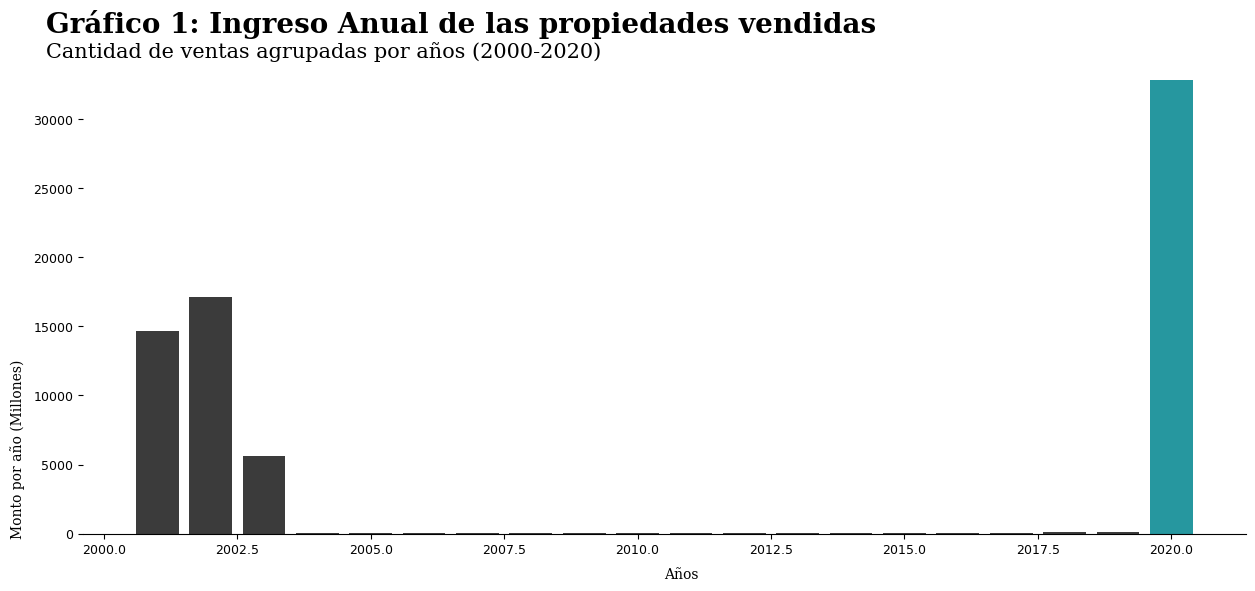

listYear
2001    14672820681
2002    17099504996
2003     5589078568
2004       36853016
2005       26514557
2006       63705175
2007       33079436
2008       23102639
2009       29416027
2010       45022620
2011       30636950
2012       39620367
2013       68258094
2014       75739322
2015       39072266
2016       30966100
2017       67593586
2018      100189550
2019      122058626
2020    32814165308
Name: saleAmount, dtype: int64


In [40]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

bar_colors= ["#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b",
            "#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#26979f"]

eje_x1 = ingresoAnual.index
eje_y1 = ingresoAnual/1000000

ax.bar(eje_x1, eje_y1,color=bar_colors)




#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Gráfico 1: Ingreso Anual de las propiedades vendidas"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.10,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             )

 

#FORMATO DEL SUBTITULO
subTitle = "Cantidad de ventas agrupadas por años (2000-2020)"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.10,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

 

#FORMATO AL EJE (X/Y)
etiquetax = "Años"
ax.set_xlabel(etiquetax,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")
etiquetay="Monto por año (Millones)"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0.5, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.05, y=-0.01, transform = ax.transAxes)
 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 9)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 



plt.show()
print(ingresoAnual)


<h1> Pregunta 2:  ¿Qué tipo de propiedad tiene mayor facilidad de venta?</h1>

In [41]:
tipoDePropiedad = df.groupby(["propertyType"]).count()
tipoDePropiedad = tipoDePropiedad.iloc[:,1:2]
tipoDePropiedad = tipoDePropiedad.sort_values(by=["listYear"], ascending=True)
tipoDePropiedad

,listYear
propertyType,
Three Family,1
Single Family,2
Two Family,2
Public Utility,4
Industrial,202
Condo,370
Apartments,438
Commercial,1819
Vacant Land,2867


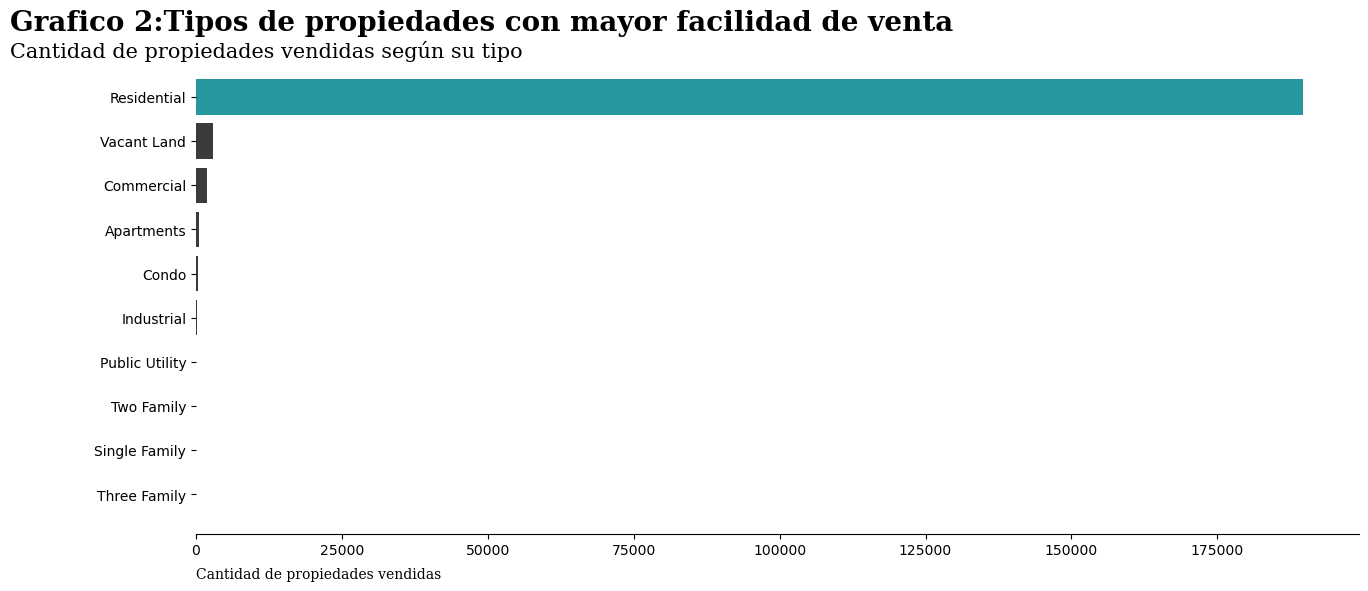

In [42]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

 

eje_x2 = tipoDePropiedad.index.tolist()
eje_y2 = tipoDePropiedad["listYear"].tolist()

 

bar_colors = ["#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b",'#26979f']
             

ax.barh(eje_x2, eje_y2, color=bar_colors)

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico 2:Tipos de propiedades con mayor facilidad de venta "
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             )

 

#FORMATO DEL SUBTITULO
subTitle = "Cantidad de propiedades vendidas según su tipo"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

 

#FORMATO AL EJE (X/Y)
etiqueta = "Cantidad de propiedades vendidas"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0, y=-0.07, transform = ax.transAxes)

 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 10)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

<h1> Pregunta 3: ¿En cuál ciudad o pueblo se dan mayor cantidad de ventas de 
propiedades? Y ¿Qué elementos particulares tienen esas ciudades o 
pueblos?</h1>

In [43]:
ciudad = df.groupby("town").agg({
    "saleAmount": "sum",
    "listYear": lambda x: mode(x),
    "propertyType": lambda x: mode(x)
})
ciudad = ciudad.sort_values(by="saleAmount", ascending=False)
ciudad.rename(columns={
    "listYear": "AñoMásComún",
    "propertyType": "tipoDePropiedadMásComún"
}, inplace=True)

respuesta = ciudad.head(3)[["saleAmount", "AñoMásComún", "tipoDePropiedadMásComún"]]
respuesta

,saleAmount,AñoMásComún,tipoDePropiedadMásComún
town,,,
Greenwich,7509491841,2020,Residential
Stamford,6663475195,2020,Residential
Norwalk,3109840252,2001,Residential


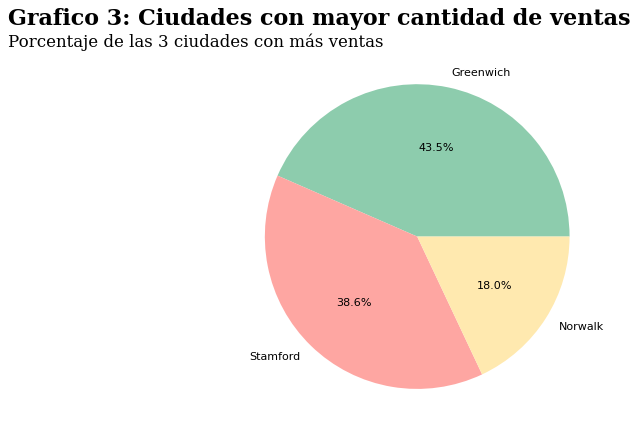

In [44]:
fig, ax = plt.subplots(1,1, figsize =(10,6.9), dpi=80)

 

eje_x = respuesta.index.tolist()
data = respuesta["saleAmount"].tolist()

 

bar_colors = ['#8dccad', '#fea6a2', '#ffe9af']

 

ax.pie(data, labels=eje_x, colors = bar_colors, autopct='%1.1f%%')

 

#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Grafico 3: Ciudades con mayor cantidad de ventas"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             )

 

#FORMATO DEL SUBTITULO
subTitle = "Porcentaje de las 3 ciudades con más ventas"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 

plt.show()

<h1> Pregunta 4:  ¿Cuál es el costo promedio de las propiedades residenciales y 
comerciales?</h1>

In [46]:
palabras = ['Residential', 'Commercial']

def categorias(property_type):
    for i in palabras:
        if i in property_type:
            return i
    return "Otro"  

df['category'] = df['propertyType'].apply(categorias)


average_costs = df.groupby('category')['assessedValue'].mean()/1000000

average_costs

category
Commercial     1.326111
Otro           0.289712
Residential    0.206704
Name: assessedValue, dtype: float64

<h1> Pregunta 5:  ¿Cuál es tipo de propiedades residenciales que se vende con mayor 
frecuencia, donde y con que costo promedio? </h1>

In [54]:
dfTemp = df[df['propertyType'] == 'Residential']

dfTemp = dfTemp[["propertyType", "residentialType", "town", "assessedValue"]]


dfTemp = dfTemp.groupby("residentialType").agg({
    "town": lambda x: mode(x),
    "propertyType": "count",
    "assessedValue": "mean",  
})
dfTemp =dfTemp.sort_values(by=["propertyType"], ascending=False)
dfTemp.rename(columns={"propertyType": "cantidadDeVentas"}, inplace=True)
dfTemp.rename(columns={"assessedValue": "promedioDeCosto"}, inplace=True)
dfTemp

,town,cantidadDeVentas,promedioDeCosto
residentialType,,,
Single Family,Stamford,173498,199869.222245
Condo,Stamford,11634,333529.605811
Two Family,New Haven,2948,147031.402646
Three Family,Hartford,1369,130159.077429
Four Family,Waterbury,248,170443.258065


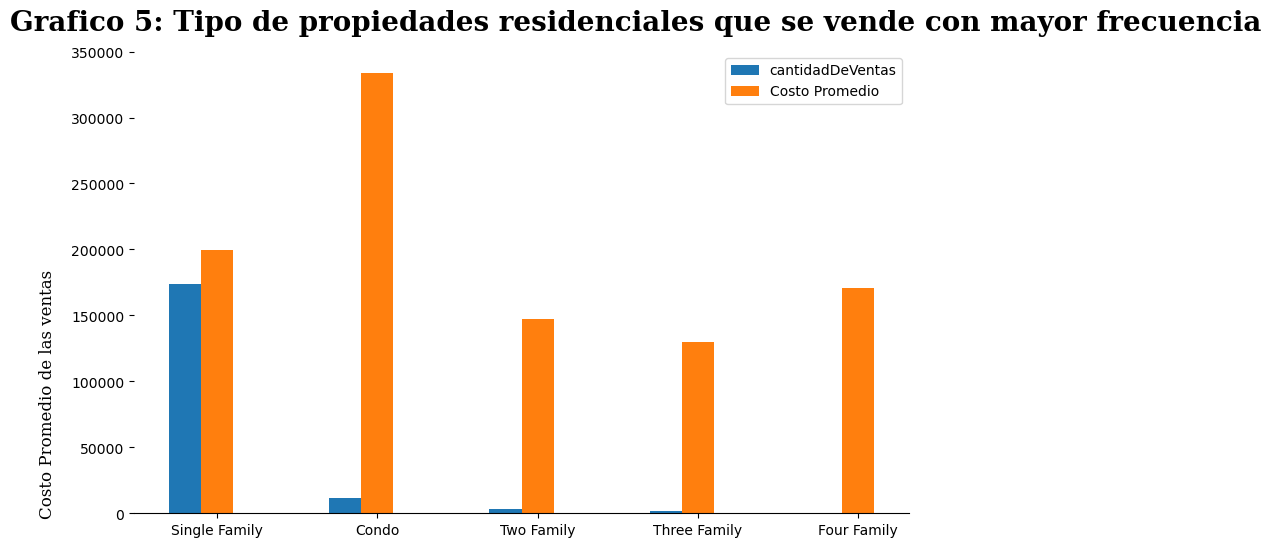

In [99]:
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(dfTemp))
width = 0.2

ax.bar(x, dfTemp["cantidadDeVentas"], width, label='cantidadDeVentas')
ax.bar([pos + width for pos in x], dfTemp["promedioDeCosto"], width, label='Costo Promedio')

ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(dfTemp.index)
title = "Grafico 5: Tipo de propiedades residenciales que se vende con mayor frecuencia"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.95,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             )
etiquetay="Costo Promedio de las ventas "

ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 12,
              fontweight = "regular",
              fontfamily = "serif")
ax.yaxis.set_label_coords(x=-0.10, y=-0.01, transform = ax.transAxes)
ax.legend()
plt.show()


<h1> Pregunta 6:  ¿Cuál es margen promedio de ganancia por cada una de las 
propiedades vendidas? </h1>

In [115]:

dfTemp5 = df[["propertyType", "salesRatio"]]
dfTemp5 = dfTemp5.groupby("propertyType").mean()
dfTemp5 = dfTemp5.sort_values(by=["salesRatio"], ascending=False)
dfTemp5




,salesRatio
propertyType,
Commercial,4.563586
Three Family,4.134800
Residential,1.805406
Industrial,1.549262
Public Utility,1.187869
Vacant Land,1.094835
Single Family,0.721350
Condo,0.698436
Apartments,0.597987


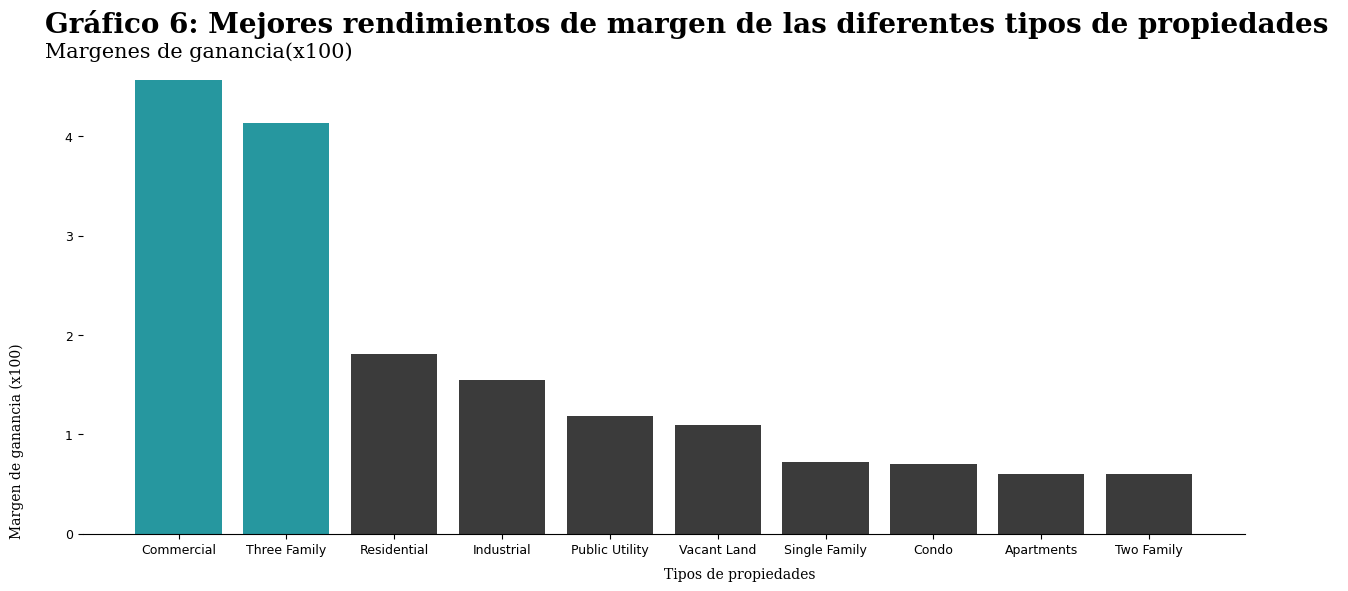

In [123]:
fig, ax = plt.subplots(1,1, figsize =(15,6.9), dpi=100)

bar_colors= ["#26979f","#26979f","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b","#3b3b3b"]

eje_x6 = dfTemp5.index
eje_y6 = dfTemp5["salesRatio"]

ax.bar(eje_x6, eje_y6,color=bar_colors)




#--------------------------------------------------------------------------------------------#
#-----------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EFES DEL GRAFICO----------------#
#--------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO

 

title = "Gráfico 6: Mejores rendimientos de margen de las diferentes tipos de propiedades "
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.10,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif",
             )

 

#FORMATO DEL SUBTITULO
subTitle = "Margenes de ganancia(x100)"
ax.set_title(subTitle,
             horizontalalignment = "left",
             x = 0.10,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

 

#FORMATO AL EJE (X/Y)
etiquetax = "Tipos de propiedades"
ax.set_xlabel(etiquetax,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")
etiquetay="Margen de ganancia (x100)"
ax.set_ylabel(etiquetay,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

ax.xaxis.set_label_coords(x=0.5, y=-0.07, transform = ax.transAxes)
ax.yaxis.set_label_coords(x=-0.05, y=-0.01, transform = ax.transAxes)
 

#FORMATO TAMANO LETRA AMBOS EJES
ax.tick_params(axis='both', labelsize = 9)

 

#CONFIGURA LA UBICACION EL TITULO, SUBTITULO Y GRAFICO
plt.subplots_adjust(top = 0.80)

 



plt.show()


<h1>CONCLUSIONES DEL ANÁLISIS </h1>

<p>Tomando en cuenta que la inmobiliaria PK2 nos contrató para realizar el análisis respectivo para validar si es viable iniciar operaciones en Estados Unidos, vamos a realizar las diferentes técnicas vistas en clase para poder sacar las conclusiones en base a las preguntas planteadas por el cliente.

Tal y como se puede observar en el año 2020 fue el año con mayor demanda de propiedades en Estados Unidos, viniendo de una escasez de ventas desde el año 2004, teniendo esto en cuenta, las propiedades con mayor facilidad de venta son las propiedades de tipo residencial, seguido de las propiedades sin construir y en tercera posición las propiedades comerciales, en segundo lugar las de tres familias, y en tercera posición las residenciales.

Sin embargo, las propiedades con mejor rendimiento de venta son las propiedades comerciales, en segundo lugar las de tres familias, y en tercer lugar las residenciales. Teniendo esto en cuenta, en los pueblos donde más se registran ventas en el año 2020, que es el año con más movimiento de ventas, es en Greenwich donde más se venden propiedades de tipo residencial.

Adicionalmente, según lo solicitado por el cliente, se realiza el análisis de cuáles son las propiedades residenciales que se venden con mayor frecuencia. Podemos observar que en este tipo de propiedades, las más vendidas a lo largo del año son las de “familias simples” en el pueblo de Stamford, donde tienen un costo promedio de 199,869 dólares. Sin embargo, con esta misma consulta, descubrimos que las residencias de tipo “Condominio” tienen un costo promedio de 333,529 dólares, que es el segundo tipo de residencia más vendida, también en Stamford.

Teniendo en cuenta esto, podemos concluir que si el cliente desea incursionar en el negocio de la venta de bienes raíces, podrían iniciar operaciones en la ciudad de Stamford, buscando como objetivo la venta de propiedades de tipo residencial, que son las más vendidas, aplicando las estrategias comerciales más enfocadas para los tipos de familia “simple”. También pueden optar por buscar el tipo “Comercial”, donde hay un gran margen de ganancia por propiedad vendida.</p>
